## Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LinearStateSpace

### Exercise 1

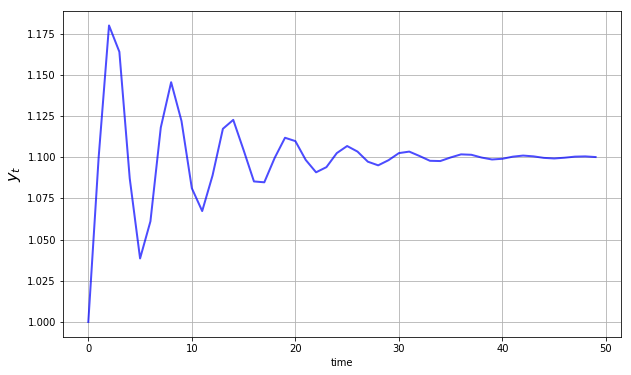

In [2]:
ϕ_0, ϕ_1, ϕ_2 = 1.1, 0.8, -0.8

A = [[1,     0,     0  ],
     [ϕ_0,   ϕ_1,   ϕ_2],
     [0,     1,     0  ]]
C = np.zeros((3, 1))
G = [0, 1, 0]

ar = LinearStateSpace(A, C, G, mu_0=np.ones(3))
x, y = ar.simulate(ts_length=50)

fig, ax = plt.subplots(figsize=(10, 6))
y = y.flatten()
ax.plot(y, 'b-', lw=2, alpha=0.7)
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('$y_t$', fontsize=16)
plt.show()

### Exercise 2

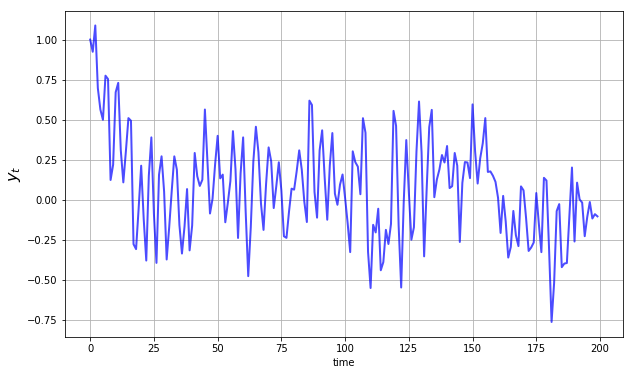

In [3]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.2

A = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
     [1,     0,     0,     0  ],
     [0,     1,     0,     0  ],
     [0,     0,     1,     0  ]]
C = [[σ],
     [0],
     [0],
     [0]]
G = [1, 0, 0, 0]

ar = LinearStateSpace(A, C, G, mu_0=np.ones(4))
x, y = ar.simulate(ts_length=200)

fig, ax = plt.subplots(figsize=(10, 6))
y = y.flatten()
ax.plot(y, 'b-', lw=2, alpha=0.7)
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('$y_t$', fontsize=16)
plt.show()

### Exercise 3

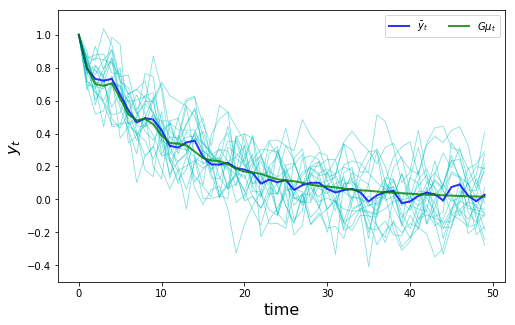

In [4]:
from scipy.stats import norm
import random

ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1

A = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
     [1,     0,     0,     0  ],
     [0,     1,     0,     0  ],
     [0,     0,     1,     0  ]]
C = [[σ],
     [0],
     [0],
     [0]]
G = [1, 0, 0, 0]

I = 20
T = 50
ar = LinearStateSpace(A, C, G, mu_0=np.ones(4))
ymin, ymax = -0.5, 1.15

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_ylim(ymin, ymax)
ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('$y_t$', fontsize=16)

ensemble_mean = np.zeros(T)
for i in range(I):
    x, y = ar.simulate(ts_length=T)
    y = y.flatten()
    ax.plot(y, 'c-', lw=0.8, alpha=0.5)
    ensemble_mean = ensemble_mean + y

ensemble_mean = ensemble_mean / I
ax.plot(ensemble_mean, color='b', lw=2, alpha=0.8, label='$\\bar y_t$')

m = ar.moment_sequence()
population_means = []
for t in range(T):
    μ_x, μ_y, Σ_x, Σ_y = next(m)
    population_means.append(float(μ_y))
ax.plot(population_means, color='g', lw=2, alpha=0.8, label='$G\mu_t$')
ax.legend(ncol=2)
plt.show()

### Exercise 4

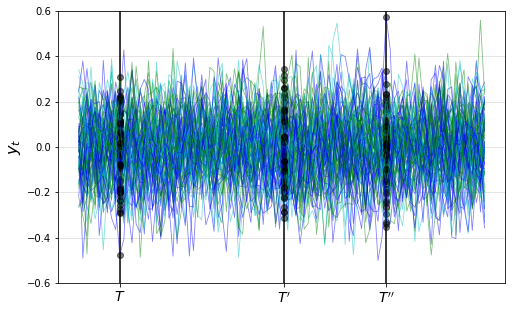

In [5]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1

A = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
     [1,     0,     0,     0  ],
     [0,     1,     0,     0  ],
     [0,     0,     1,     0  ]]
C = [[σ],
     [0],
     [0],
     [0]]
G = [1, 0, 0, 0]

T0 = 10
T1 = 50
T2 = 75
T4 = 100

ar = LinearStateSpace(A, C, G, mu_0=np.ones(4), Sigma_0=Σ_x)
ymin, ymax = -0.6, 0.6

fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(alpha=0.4)
ax.set_ylim(ymin, ymax)
ax.set_ylabel('$y_t$', fontsize=16)
ax.vlines((T0, T1, T2), -1.5, 1.5)

ax.set_xticks((T0, T1, T2))
ax.set_xticklabels(("$T$", "$T'$", "$T''$"), fontsize=14)

μ_x, μ_y, Σ_x, Σ_y = ar.stationary_distributions()
ar.mu_0 = μ_x
ar.Sigma_0 = Σ_x

for i in range(80):
    rcolor = random.choice(('c', 'g', 'b'))
    x, y = ar.simulate(ts_length=T4)
    y = y.flatten()
    ax.plot(y, color=rcolor, lw=0.8, alpha=0.5)
    ax.plot((T0, T1, T2), (y[T0], y[T1], y[T2],), 'ko', alpha=0.5)
plt.show()

**Footnotes**

<p><a id=foot1 href=#foot1-link><strong>[1]</strong></a> The eigenvalues of $ A $ are $ (1,-1, i,-i) $.

<p><a id=fn-ag href=#fn-ag-link><strong>[2]</strong></a> The correct way to argue this is by induction.  Suppose that
$ x_t $ is Gaussian.  Then [(1)](#equation-st-space-rep) and
[(10)](#equation-lss-glig) imply that $ x_{t+1} $ is Gaussian.  Since $ x_0 $
is assumed to be Gaussian, it follows that every $ x_t $ is Gaussian.
Evidently this implies that each $ y_t $ is Gaussian.